# <span style="color:red"> Numerical Simulation 05 </span>

## Exercise 05.1

In this excercise I've implemented a Metropolis algorithm and tested it on the wave functions of the hydrogen atom. Indeed the square modulus of the wave function is a probability distribution, that I've sampled using the metropolis algorithm.

- I've used the Bhor radius ($a_0=4\pi\epsilon_0\hbar^2/m_e e^2$) as unit for the distances, rescaling $r=r/a_0$ and renormalizing the wave functions, I've obtained the following probability distibutions for the ground state (1s) and the first excited state (2p) of hydrogen (in Cartesian Coordinates): $$|\Psi_{1,0,0}(x,y,z)|^2=
\frac{1}{\pi} e^{-2 \sqrt{x^2+y^2+z^2}} $$  $$|\Psi_{2,1,0}(x,y,z)|^2=\frac{1}{32 \pi} z^2 e^{-\sqrt{x^2+y^2+z^2}}$$ In this way there is no risk of underflow, or overflow and the predicted results become: $$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5
$$


- Firstly I've used an uniform transition probability $T(\vec{x}|\vec{y})$, to calculate the new proposed point. To respect the empirical law of $50%$, I've done some attempts, with both probability, changing the distance $d$, in which the point was generated. I found out that, using $500$ throwns, $d=1.5$ was good for the 1s (acceptance of 51%), but not for the 2p (acceptance of 27%). So I've set $d=3.5$ for the 2p simulation, and that was giving me an accptance of 53%. Then I tried using normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, and I've firstly tried using as $\sigma$ the same $d$ used before, but the acceptance dropped drastically. Indeed a Gaussian distribution, centred in $x$, with $\sigma=d$ will generate numbers also outside $x+d$, that's not happening with the uniform distribution in which $d$ is the outer limit. So I had to reduce $\sigma$ to have an acceptance around 50%. I've found that these values produced results in good agreement with the empirical law: $\sigma=0.7$ for 1s (acceptance of 53%), and $\sigma=1.8$ for 2p (acceptance of 51%).


- As starting points, I've taken two points not to far from the origin, that were a little to far than what I expected as a resut. The origin is not a good starting point because, especially for 1s, it tends to remain in $0$ for the first few steps. Also for the first excited state the origin is not an accesible point for electrons, so it has no physical meaning. Even starting too far away from the origin was not good, because it needed much more steps to equilibrate the system. With the previous considerations, I've chosen the following starting points $x_0=(3,3,3)$ for 1s, and $x_0=(7,7,7)$ for 2p, and I've then checked how many steps the system needed to be equilibrated. They were few, in both cases, so I've set an equilibration of $200$ steps, before taking measures.Even with the Gaussian steps the cosiderations are similar, but I've observed that it needed a longer equilibration (I've set $400$ steps).


- In this exercise we need to use the blocking method, to calculate mean and error, due to correlation between the points of the Metropolis algorithm. To reduce correlation is useful to put as much of the correlated points in one block, so that the two blocks are note correlated. I've chose to run the simulation with a total number of steps $M=10^7$, and divide them in $N=10^3$ blocks, so that in each block I have $10^4$ points. Due to graphical problems, I've chosen to plot only a block out of $10$, because a plot with $1000$ points and errors was not understandable. In the plot you can also see that errors seems very little, but its due to the fact that the first blocks has a much larger error, that scales the others. 


- While running the simulation with so many steps, I've rechecked the acceptances, and they were all between 51% and 53%.


**Results**

In the following plots you can see that all the simulations has produced cosistent results. Comparing the results obtained with the uniform step and the Gaussian step, we can see that they produce the same exact resuts, with ucertaintes of the same order. I've, as always, noticed a large dependence of my results from the seed of the random generator.

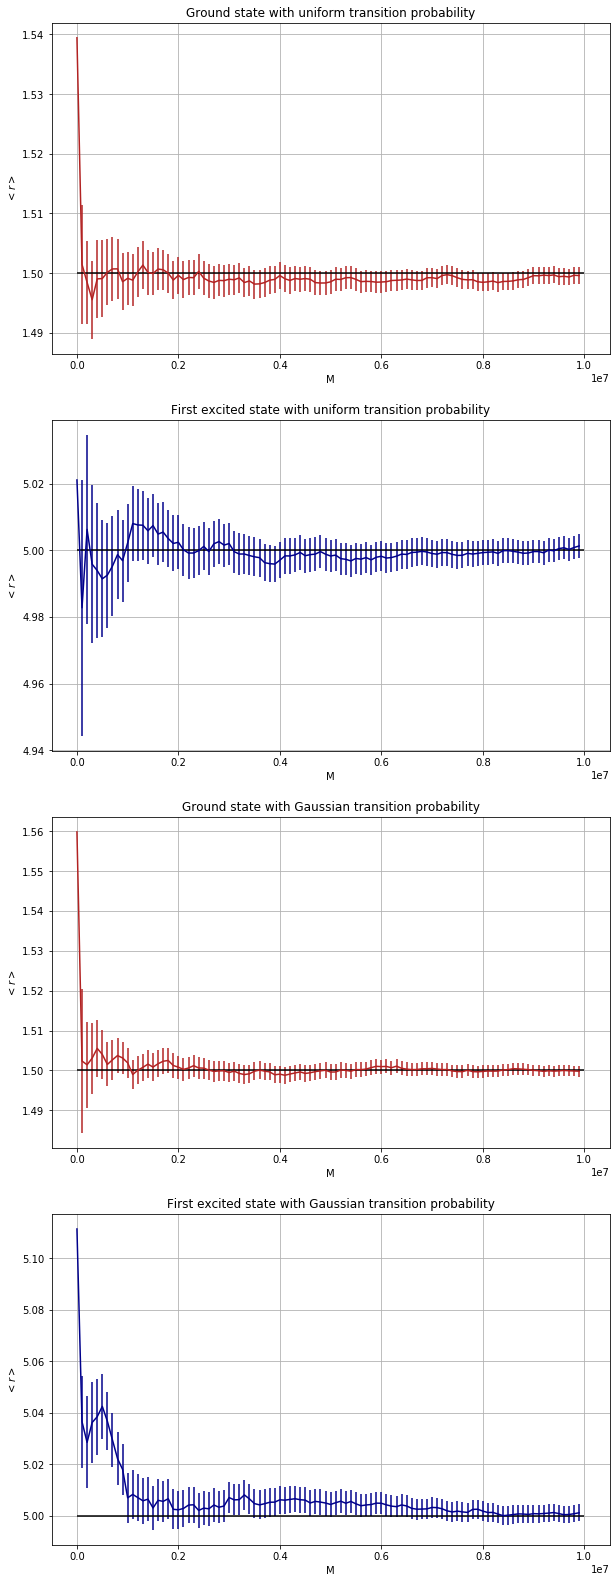

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x=np.arange(100)
x*=pow(10,5)

U1s, errU1s=np.loadtxt("groundstateU.dat", unpack=True)
U2p, errU2p=np.loadtxt("excitedstateU.dat", unpack=True)
G1s, errG1s=np.loadtxt("groundstateG.dat", unpack=True)
G2p, errG2p=np.loadtxt("excitedstateG.dat", unpack=True)

fig=plt.figure(figsize=(10,28))
plt.subplot(411)
plt.errorbar(x, U1s, yerr=errU1s, color="firebrick")
plt.xlabel('M')
plt.ylabel('$< r >$')
plt.hlines(1.5, 0, pow(10,7))
plt.title("Ground state with uniform transition probability")
plt.grid(True)

plt.subplot(412)
plt.errorbar(x, U2p, yerr=errU2p, color="darkblue")
plt.xlabel('M')
plt.ylabel('$ < r >$')
plt.hlines(5, 0, pow(10,7))
plt.title("First excited state with uniform transition probability")
plt.grid(True)

plt.subplot(413)
plt.errorbar(x, G1s, yerr=errG1s, color="firebrick", label="Total energy")
plt.xlabel('M')
plt.ylabel('$< r >$')
plt.hlines(1.5, 0, pow(10,7))
plt.title("Ground state with Gaussian transition probability")
plt.grid(True)

plt.subplot(414)
plt.errorbar(x, G2p, yerr=errG2p, color="darkblue", label="Temperature")
plt.xlabel('M')
plt.ylabel('$< r >$')
plt.hlines(5, 0, pow(10,7))
plt.title("First excited state with Gaussian transition probability")
plt.grid(True)